## **Introduction**

##### Air pollution is a critical environmental issue, impacting health and ecosystems worldwide. This project focuses on analyzing and predicting air quality using a dataset collected from various monitoring stations in India. The data includes geographic details, pollutant levels (PM10, NH3, OZONE, etc.), and statistical measures such as minimum, maximum, and average pollutant concentrations.

##### By leveraging machine learning techniques, the project aims to uncover pollution trends, identify high-risk areas, and provide accurate predictions to support effective decision-making. This work contributes to mitigating the adverse effects of pollution by enabling targeted interventions.

In [82]:
import pandas as pd
import numpy as np

##### Load the Dataset #####

In [83]:
df=pd.read_csv(r'C:\Data_Analytics\Projects\ML_project\Pollutant_Radar.csv')
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",17-01-2025 18:00:00,26.071318,91.874880,PM10,75.0,252.0,177.0
1,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",17-01-2025 18:00:00,26.071318,91.874880,NH3,1.0,5.0,3.0
2,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",17-01-2025 18:00:00,26.071318,91.874880,OZONE,22.0,57.0,43.0
3,India,Assam,Guwahati,"IITG, Guwahati - PCBA",17-01-2025 18:00:00,26.202864,91.700464,PM10,59.0,199.0,152.0
4,India,Assam,Guwahati,"IITG, Guwahati - PCBA",17-01-2025 18:00:00,26.202864,91.700464,NH3,5.0,5.0,5.0


In [84]:
type(df)

pandas.core.frame.DataFrame

In [85]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,1358.000000,1358.000000,1291.000000,1291.000000,1291.000000
mean,22.260818,78.817265,33.151820,88.290473,56.346243
std,5.489397,4.942490,39.877859,98.716500,61.487052
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,18.976700,75.675238,6.000000,17.000000,12.000000
50%,23.041137,77.482194,18.000000,54.000000,35.000000
75%,26.766433,80.948222,47.000000,120.000000,81.000000
max,34.066206,94.636574,293.000000,500.000000,378.000000


In [86]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1353    False
1354    False
1355    False
1356    False
1357    False
Length: 1358, dtype: bool

##### Identify Missing Values #####

In [87]:
df.isnull().sum()

country           0
state             0
city              0
station           0
last_update       0
latitude          0
longitude         0
pollutant_id      0
pollutant_min    67
pollutant_max    67
pollutant_avg    67
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1358 non-null   object 
 1   state          1358 non-null   object 
 2   city           1358 non-null   object 
 3   station        1358 non-null   object 
 4   last_update    1358 non-null   object 
 5   latitude       1358 non-null   float64
 6   longitude      1358 non-null   float64
 7   pollutant_id   1358 non-null   object 
 8   pollutant_min  1291 non-null   float64
 9   pollutant_max  1291 non-null   float64
 10  pollutant_avg  1291 non-null   float64
dtypes: float64(5), object(6)
memory usage: 116.8+ KB


##### Handle Missing Values #####

In [89]:
df['pollutant_min'].fillna(df['pollutant_min'].mean(),inplace=True)
df['pollutant_max'].fillna(df['pollutant_max'].mean(),inplace=True)
df['pollutant_avg'].fillna(df['pollutant_avg'].mean(),inplace=True)

In [90]:
df.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [91]:
# Convert Strings to Datetime
df['last_update'] = pd.to_datetime(df['last_update'])

In [92]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",2025-01-17 18:00:00,26.071318,91.874880,PM10,75.0,252.0,177.0
1,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",2025-01-17 18:00:00,26.071318,91.874880,NH3,1.0,5.0,3.0
2,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",2025-01-17 18:00:00,26.071318,91.874880,OZONE,22.0,57.0,43.0
3,India,Assam,Guwahati,"IITG, Guwahati - PCBA",2025-01-17 18:00:00,26.202864,91.700464,PM10,59.0,199.0,152.0
4,India,Assam,Guwahati,"IITG, Guwahati - PCBA",2025-01-17 18:00:00,26.202864,91.700464,NH3,5.0,5.0,5.0


In [93]:
df1=df

In [94]:
df1.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",2025-01-17 18:00:00,26.071318,91.874880,PM10,75.0,252.0,177.0
1,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",2025-01-17 18:00:00,26.071318,91.874880,NH3,1.0,5.0,3.0
2,India,Assam,Byrnihat,"Central Academy for SFS, Byrnihat - PCBA",2025-01-17 18:00:00,26.071318,91.874880,OZONE,22.0,57.0,43.0
3,India,Assam,Guwahati,"IITG, Guwahati - PCBA",2025-01-17 18:00:00,26.202864,91.700464,PM10,59.0,199.0,152.0
4,India,Assam,Guwahati,"IITG, Guwahati - PCBA",2025-01-17 18:00:00,26.202864,91.700464,NH3,5.0,5.0,5.0


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [96]:
# Drop rows with missing target values 
data_cleaned = df1.dropna(subset=["pollutant_avg"]).copy()

In [97]:
# Categorize 'pollutant_avg' into classes (Low, Moderate, High)
# Using arbitrary thresholds for demonstration 
bins = [0, 50, 100, float('inf')]
labels = ["Low", "Moderate", "High"]
data_cleaned["pollutant_class"] = pd.cut(data_cleaned["pollutant_avg"], bins=bins, labels=labels)

In [98]:
# Encode categorical features
label_encoders = {}
categorical_columns = ["country", "state", "city", "station", "pollutant_id"]

for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

In [99]:
# Drop unnecessary columns
data_preprocessed = data_cleaned.drop(columns=["last_update", "pollutant_min", "pollutant_max", "pollutant_avg"])

##### Split Data into Features (X) and Target (y) #####

In [100]:
X = data_preprocessed.drop(columns=["pollutant_class"])
y = data_preprocessed["pollutant_class"]

##### Split into Training and Testing Sets

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()


((1086, 7),
 (272, 7),
 Low         627
 Moderate    255
 High        204
 Name: pollutant_class, dtype: int64,
 Low         167
 Moderate     63
 High         42
 Name: pollutant_class, dtype: int64)

## **KNN**

In [102]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [103]:
knn_class=KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=2 )
knn_class.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [104]:
y_pred_knn=knn_class.predict(X_test)
Accuracy_Knn=round((metrics.accuracy_score(y_test, y_pred_knn)*100),2)
print('Accuracy (KNN): ',Accuracy_Knn,"%")

Accuracy (KNN):  61.4 %


##### Classification Report

In [105]:
unique_classes = np.unique(np.concatenate((y_test, y_pred_knn)))

print(classification_report(y_test, y_pred_knn, target_names=[f'class {i}' for i in unique_classes]))

                precision    recall  f1-score   support

    class High       0.29      0.05      0.08        42
     class Low       0.63      0.96      0.76       167
class Moderate       0.50      0.06      0.11        63

      accuracy                           0.61       272
     macro avg       0.47      0.36      0.32       272
  weighted avg       0.54      0.61      0.50       272



## **SVM**

In [106]:
from sklearn.svm import SVC

In [107]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [108]:
# Make predictions using the SVM classifier
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
Accuracy_SVM = round(metrics.accuracy_score(y_test, y_pred_svm) * 100, 2)
print("Accuracy (SVM):", Accuracy_SVM, "%")



Accuracy (SVM): 61.4 %


##### Classification Report

In [109]:
unique_classes = np.unique(np.concatenate((y_test, y_pred_svm)))

print(classification_report(y_test, y_pred_svm, target_names=[f'class {i}' for i in unique_classes]))

                precision    recall  f1-score   support

    class High       0.00      0.00      0.00        42
     class Low       0.61      1.00      0.76       167
class Moderate       0.00      0.00      0.00        63

      accuracy                           0.61       272
     macro avg       0.20      0.33      0.25       272
  weighted avg       0.38      0.61      0.47       272



c:\Users\Cherukulathu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Cherukulathu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Cherukulathu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Decision Tree**

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
DT_class=DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_class.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [112]:
y_pred_DT= DT_class.predict(X_test)
Accuracy_DT=round((metrics.accuracy_score(y_test, y_pred_DT)*100),2)
print('Accuracy (Decision Tree): ',Accuracy_DT,"%")

Accuracy (Decision Tree):  73.9 %


##### Classification Report

In [113]:
unique_classes = np.unique(np.concatenate((y_test, y_pred_svm)))

print(classification_report(y_test, y_pred_DT, target_names=[f'class {i}' for i in unique_classes]))

                precision    recall  f1-score   support

    class High       0.68      0.76      0.72        42
     class Low       0.87      0.85      0.86       167
class Moderate       0.44      0.43      0.44        63

      accuracy                           0.74       272
     macro avg       0.66      0.68      0.67       272
  weighted avg       0.74      0.74      0.74       272



## **Random Forest**

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
random_class= RandomForestClassifier(n_estimators= 20, criterion="entropy")
random_class.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [116]:
y_pred_RF= random_class.predict(X_test)
Accuracy_RF=round((metrics.accuracy_score(y_test, y_pred_RF)*100),2)
print('Accuracy (Random Forest): ',Accuracy_RF,"%")

Accuracy (Random Forest):  77.57 %


##### Classification Report

In [117]:
unique_classes = np.unique(np.concatenate((y_test, y_pred_RF)))

print(classification_report(y_test, y_pred_RF, target_names=[f'class {i}' for i in unique_classes]))

                precision    recall  f1-score   support

    class High       0.66      0.79      0.72        42
     class Low       0.86      0.92      0.89       167
class Moderate       0.56      0.38      0.45        63

      accuracy                           0.78       272
     macro avg       0.69      0.70      0.69       272
  weighted avg       0.76      0.78      0.76       272



## **Naive Bayes**

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [120]:
# Make predictions
y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = round(metrics.accuracy_score(y_test, y_pred_nb) * 100, 2)
print("Accuracy (Naive Bayes):", accuracy_nb, "%")

Accuracy (Naive Bayes): 70.22 %


##### Classification Report

In [121]:
unique_classes = np.unique(np.concatenate((y_test, y_pred_nb)))

print(classification_report(y_test, y_pred_nb, target_names=[f'class {i}' for i in unique_classes]))

                precision    recall  f1-score   support

    class High       0.57      0.57      0.57        42
     class Low       0.73      0.99      0.84       167
class Moderate       0.50      0.02      0.03        63

      accuracy                           0.70       272
     macro avg       0.60      0.53      0.48       272
  weighted avg       0.65      0.70      0.61       272



## **Logistic Regression**

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [124]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = round(metrics.accuracy_score(y_test, y_pred_logistic) * 100, 2)
print("Accuracy (Logistic Regression):", accuracy_logistic, "%")

Accuracy (Logistic Regression): 51.84 %


##### Classification Report

In [125]:
unique_classes = np.unique(np.concatenate((y_test, y_pred_logistic)))

print(classification_report(y_test, y_pred_logistic, target_names=[f'class {i}' for i in unique_classes]))

                precision    recall  f1-score   support

    class High       0.11      0.10      0.10        42
     class Low       0.59      0.82      0.68       167
class Moderate       0.00      0.00      0.00        63

      accuracy                           0.52       272
     macro avg       0.23      0.31      0.26       272
  weighted avg       0.38      0.52      0.44       272



## **Data Visualization**

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Bar Plot**

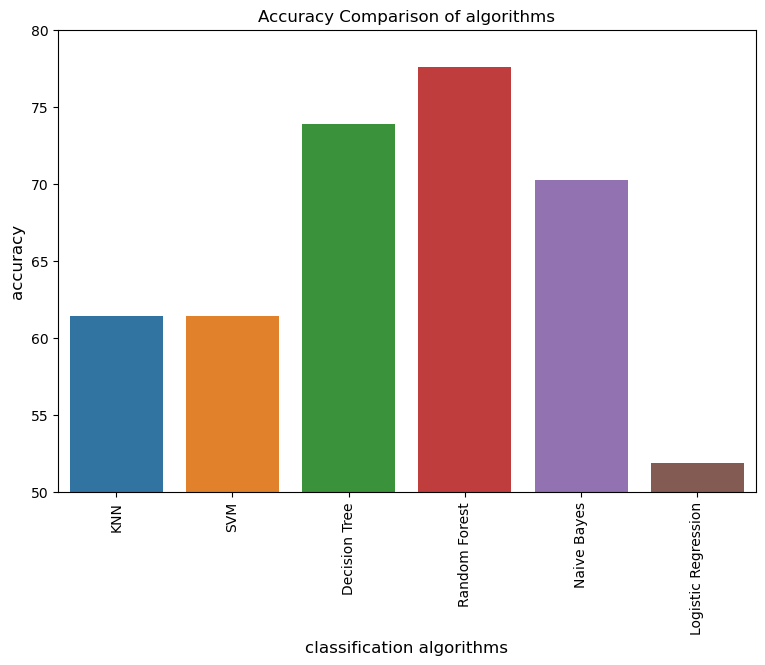

In [133]:
plt.figure(figsize=(9,6))
acc=[61.4, 61.4, 73.9, 77.57, 70.22, 51.84]
alg=['KNN','SVM','Decision Tree','Random Forest', 'Naive Bayes', 'Logistic Regression']
plt.ylim(50,80)
sns.barplot(x=alg, y=acc)
plt.xticks(rotation='vertical')
plt.xlabel('classification algorithms', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title("Accuracy Comparison of algorithms")
plt.show()

##### **The bar plot above compares the accuracies of the machine learning models. Key observations:**

##### Random Forest achieves the highest accuracy (77.57%), making it the most effective model for this dataset. Decision Tree and Naive Bayes also perform well with accuracies of 73.9% and 70.22%, respectively. KNN and Logistic Regression have the lowest accuracies (51.84%).

### **Histogram**

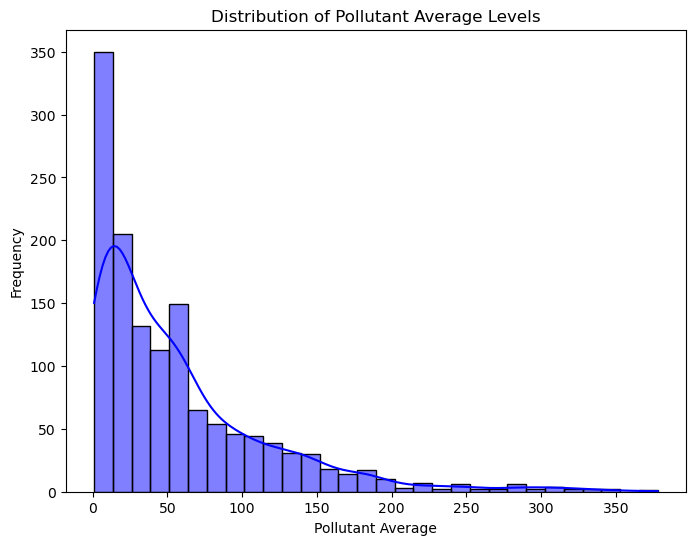

In [128]:
plt.figure(figsize=(8, 6))
sns.histplot(df1, x="pollutant_avg", kde=True, bins=30, color="blue")
plt.title("Distribution of Pollutant Average Levels")
plt.xlabel("Pollutant Average")
plt.ylabel("Frequency")
plt.show()

##### **The histogram shows the distribution of pollutant average levels across the dataset:**

##### Most values are concentrated at lower levels, indicating a higher frequency of lower pollution levels. The distribution is right-skewed, with a few high values indicating extreme pollution levels in some areas.

### **Heat Map**

C:\Users\Cherukulathu\AppData\Local\Temp\ipykernel_4528\213450197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f")


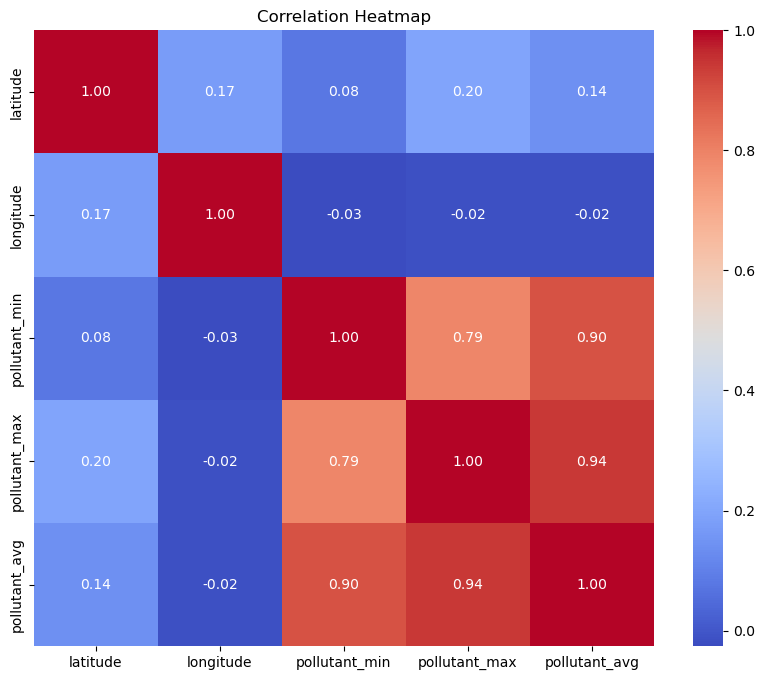

In [129]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### **The heatmap shows the correlations between numerical features:**

High positive correlation between pollutant_min, pollutant_max, and pollutant_avg. This suggests that the minimum, maximum, and average pollutant levels are strongly related, as expected. No negative correlations, indicating all numerical features move together.

### **Count Plot**

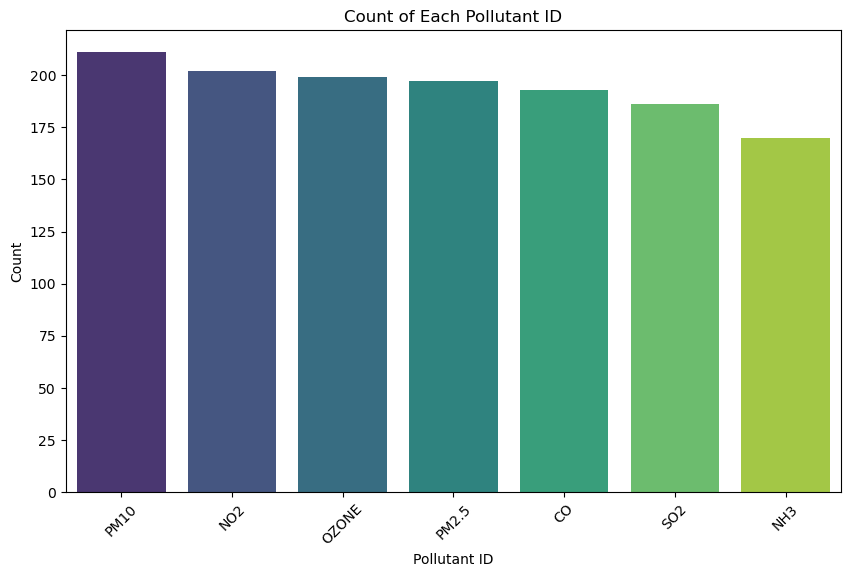

In [130]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x="pollutant_id", order=df1["pollutant_id"].value_counts().index, palette="viridis")
plt.title("Count of Each Pollutant ID")
plt.xlabel("Pollutant ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### **The count plot shows the frequency of each pollutant ID in the dataset:**

##### Certain pollutants, like PM10, are monitored more frequently compared to others. Less common pollutants have significantly lower counts, indicating a potential need for broader monitoring coverage.

### **Scatter Plot**

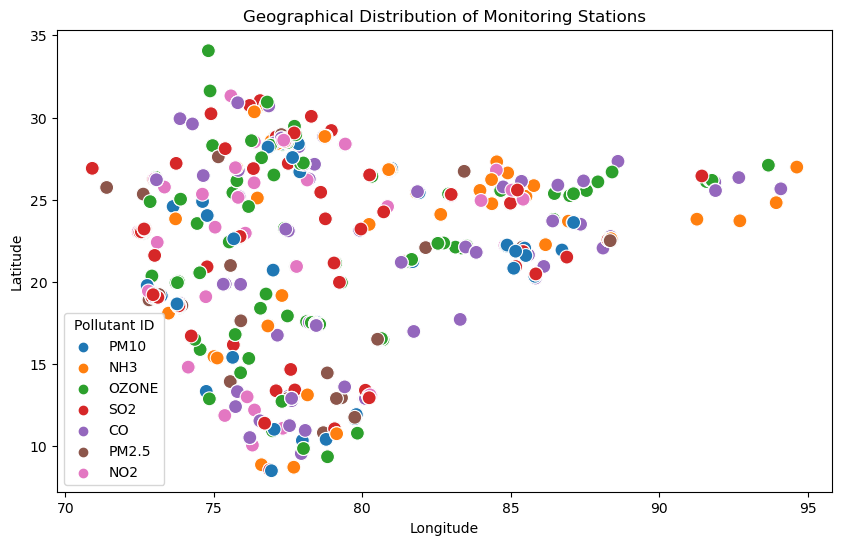

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x="longitude", y="latitude", hue="pollutant_id", palette="tab10", s=100)
plt.title("Geographical Distribution of Monitoring Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Pollutant ID")
plt.show()

##### **The scatter plot illustrates the geographical distribution of monitoring stations:**

Stations are spread across various latitudes and longitudes, covering different regions. The color coding highlights the monitoring of different pollutants at each station.
Some areas have multiple pollutants monitored, while others focus on specific ones.

### **Box Plot**

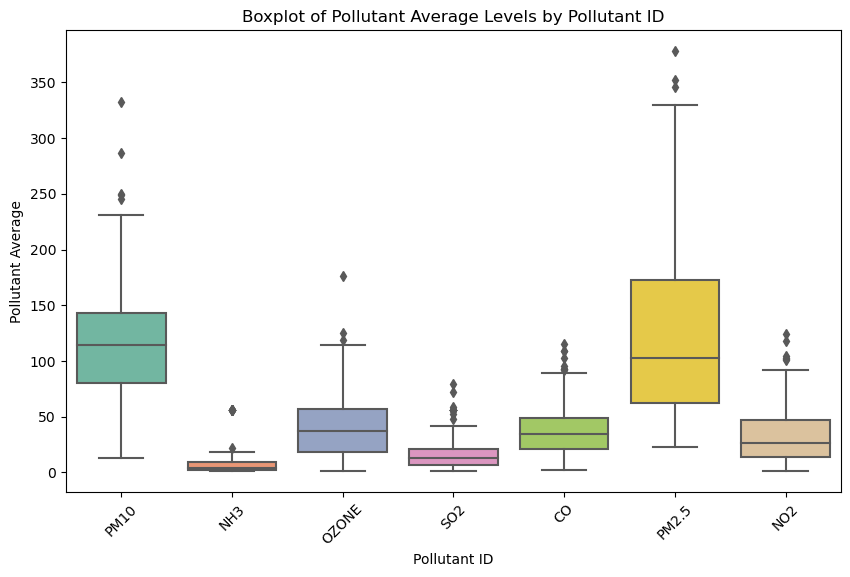

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x="pollutant_id", y="pollutant_avg", palette="Set2")
plt.title("Boxplot of Pollutant Average Levels by Pollutant ID")
plt.xlabel("Pollutant ID")
plt.ylabel("Pollutant Average")
plt.xticks(rotation=45)
plt.show()

##### **The box plot displays the distribution of pollutant average levels for each pollutant ID:**

PM10 and PM2.5 show higher median and variability in levels compared to other pollutants. Some pollutants like NH3 and OZONE have relatively consistent levels (lower variability). Outliers are visible in most pollutant categories, indicating occasional extreme pollution levels.

## **Conclusion**

##### Through this project, machine learning models were developed to analyze and predict air quality based on pollutant data. These models provided actionable insights into pollution trends and high-risk zones, equipping policymakers and environmental agencies with tools to address pollution effectively.

##### The results highlight the potential of data-driven approaches in tackling environmental challenges. Future enhancements, such as integrating weather data and expanding the dataset, could further improve the accuracy and applicability of predictions. This project underscores the importance of leveraging technology for sustainable air quality management and public health improvement.